# Расчет тензора инерции для кельтского камня

In [87]:
import numpy as np
import scipy
import sympy as sm
import matplotlib.pyplot as plt
plt.rcParams["text.latex.preamble"]=r"\usepackage{amsmath}"
plt.rcParams['text.usetex'] = True
from mpl_toolkits.mplot3d import axes3d 

# чтобы работала 3D-крутилка
%matplotlib ipympl  

# Работа с физическими величинами
%load_ext PhysicalQuantities.ipython
from PhysicalQuantities import q, QA 

# Надо когда-нибудь попробовать и распространение ошибки, но тут это явно лишнее.
#from uncertainties import ufloat
#from uncertainties.umath import *

# Точность
%precision 1

The PhysicalQuantities.ipython extension is already loaded. To reload it, use:
  %reload_ext PhysicalQuantities.ipython


'%.1f'

![](pics/rb-sizes-and-weight.svg)

In [88]:
import sympy as sm

In [89]:
Длина = 95.6mm
Ширина = 17.7mm
Высота = 10.9mm
Вес = 11g 

Длина, Ширина, Высота, Вес

(95.6 mm, 17.7 mm, 10.9 mm, 11 g)

In [90]:
Длина.autoscale, Ширина.autoscale, Вес.autoscale

(9.6 cm, 1.8 cm, 11.0 g)

![](pics/rb-for-volume-density.svg)

In [91]:
Вес_с_водой = 479g
Вес_без_воды = 251g
Вес_с_водой_и_камнями = 501g
Высота_без_камней = 70.5mm
Высота_c_камнями = 75.7mm
Диаметр_стакана = 71.1mm

Объем_камней = np.pi * Диаметр_стакана**2 / 4 * (Высота_c_камнями - Высота_без_камней)
#Объем_воды = np.pi * Диаметр_стакана**2 / 4 * Высота_без_камней
Плотность_камней = (Вес_с_водой_и_камнями - Вес_с_водой) / Объем_камней

Плотность_камней.base, Плотность_камней, Плотность_камней.autoscale
# Странно работает autoscale, возможно надо обсудить с авторами.

(1065.6 kg/m^3, 0.0 g/mm^3, 0.0 g/mm^3)

In [92]:

#Плотность_воды = (Вес_с_водой - Вес_без_воды) / Объем_воды
Плотность_камней.to("kg/m**3") #, Плотность_воды.to("kg/m**3")
# Грубо, но в порядок плотностей пластиков попадает.


1065.6 $\frac{\text{kg}}{\text{m}^3}$

Полуось $x_a$ в сантиметрах:

In [93]:
a = Длина.to('cm').value/2
a 

4.8

Полуось $x_b$ в сантиметрах:

In [94]:
b = Ширина.to('cm').value/2
b

0.9

Полуось $x_с$ в сантиметрах:

In [95]:
c = Высота.to('cm').value/2
c

0.5

Плотность «кг/м^3»

In [96]:
density = Плотность_камней.to("kg/m**3").value
density

1065.6

## Моделирование «кельтского камня» формой полуэллипсоида

### Вывод формул инерции для простых тел с помощью sympy


Что-то я завалил задачу про момент инерции полушара. Решу-ка я ее с sympy (потом бы ее с sympy mechanics)

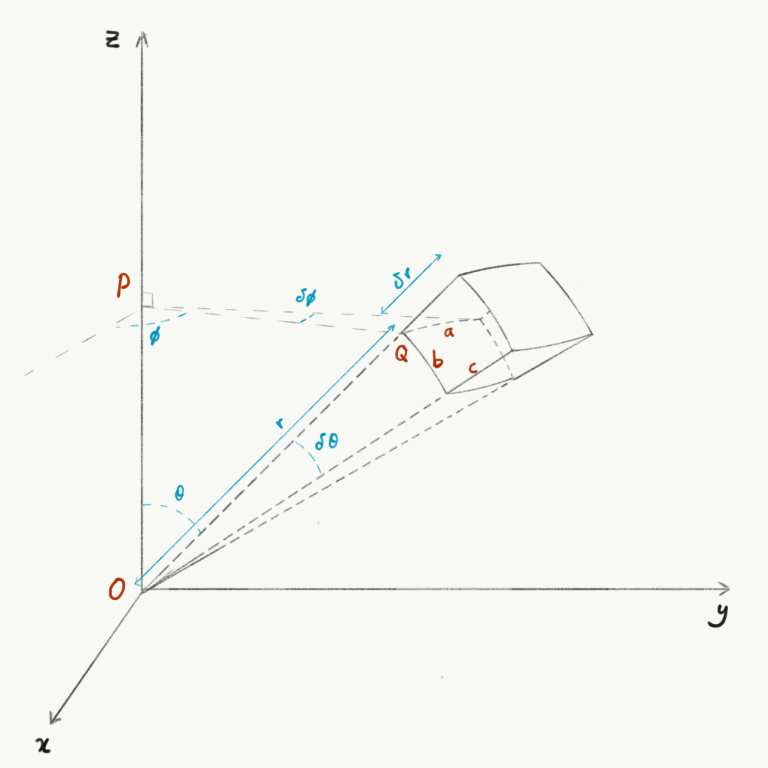

$$  a = PQ \delta \phi $$
$$  b = r \delta \theta $$
$$  c = \delta r $$

Элементарный объем
$$
   \delta V \approx a × b × c \approx r \sin \theta \delta \phi × r \delta \theta × \delta r \approx r^2 \sin \theta \delta \phi \theta \delta r
$$


In [97]:
m, x, y, r, theta, phi, R = sm.symbols('m x y r theta phi R')
элементарный_объем = r ** 2 * sm.sin(phi)

объем_полушара = sm.integrate(элементарный_объем, 
                                (r,     0, R), 
                                (phi,   0, sm.pi), 
                                (theta, 0, sm.pi))
объем_полушара
                            


2*pi*R**3/3

In [98]:
плотность_шара = m / объем_полушара
# покрутим вокруг оси y
радиус_вращения = r * sm.sin(phi)

момент_инерции_полушара = sm.integrate( радиус_вращения**2 * плотность_шара * элементарный_объем, 
                                (r,     0, R), 
                                (phi,   0, sm.pi), 
                                (theta, 0, sm.pi))

момент_инерции_полушара

2*R**2*m/5

In [99]:

сдвиг_центра_масс = sm.integrate( x * sm.pi * (R**2 - x**2), (x, 0, R)) / объем_полушара
расстояние_от_точки_подвеса_до_центра_масс = sm.sqrt(сдвиг_центра_масс**2 + R**2)
момент_инерции_относительно_оси_шара = момент_инерции_полушара              #2 * m * R**2 / 5    # попробовать вывести
момент_инерции_относительно_центра_масс = момент_инерции_относительно_оси_шара - m * сдвиг_центра_масс**2
момент_инерции_относительно_подвеса = момент_инерции_относительно_центра_масс + m * расстояние_от_точки_подвеса_до_центра_масс**2 
момент_инерции_относительно_подвеса


7*R**2*m/5

In [100]:
#тоже самое, сдвинув систему отсчета вниз.
сдвиг_центра_масс = sm.integrate( x* sm.pi * x**2, (x, 0, R)) / объем_полушара
расстояние_от_точки_подвеса_до_центра_масс = sm.sqrt( (R-сдвиг_центра_масс)**2 + R**2)
момент_инерции_относительно_оси_шара = 2 * m * R**2 / 5    # попробовать вывести
момент_инерции_относительно_центра_масс = момент_инерции_относительно_оси_шара - m * (R-сдвиг_центра_масс)**2
момент_инерции_относительно_подвеса = момент_инерции_относительно_центра_масс + m * расстояние_от_точки_подвеса_до_центра_масс**2 
момент_инерции_относительно_подвеса

7*R**2*m/5

In [101]:
def момент_инерции_эллипсоида():
    a, b, c = sm.symbols('a, b, c')
    m, x, y, r, theta, phi, R = sm.symbols('m x y r theta phi R')
    ra = a * r
    rb = b * r 
    rc = c * r
    x = ra * sm.cos(phi) * sm.sin(phi)
    y = rb * sm.sin(phi) * sm.sin(theta)
    z = rc * sm.cos(theta)
    элементарный_объем = ra * rb * c * sm.sin(phi) 
    объем_полуэллипсоида = sm.integrate(элементарный_объем, 
                                (r,     0, 1), 
                                (phi,   0, sm.pi), 
                                (theta, 0, sm.pi))    
    
    плотность = m / объем_полуэллипсоида
    момент_инерции_полуэллипсоида = sm.integrate( (rb * rc * sm.sin(phi) ) * плотность * элементарный_объем, 
                                (r,     0, 1), 
                                (phi,   0, sm.pi), 
                                (theta, 0, sm.pi))
    # момент_инерции_полуэллипсоида — пока получилось неверно, с этим надо разбираться глубоко, и непонятно, оценят ли в этой работе.

    return объем_полуэллипсоида, None

    ...

момент_инерции_эллипсоида()    

(2*pi*a*b*c/3, None)

In [102]:


import PhysicalQuantities.numpywrapper as nw



In [103]:
def свойства_инерции_полуэллипсоида():
    плотность = Плотность_камней
    a = Длина
    b = Ширина
    c = Высота
    масса_полуэллипсоида = 2 * np.pi * a * b * c * плотность / 3
    # Используем известную формулу для матрицы инерции полуэллипсоида
    # С массивами физические величины работают странно, или не работают, https://github.com/juhasch/PhysicalQuantities/issues/148
    # поэтому надо перекинуть в СГС и взять чистый флоат
    I_xx =   (масса_полуэллипсоида *  (b**2 + c**2) ).base.value / 10
    I_yy = 2 / 5 * (масса_полуэллипсоида *  (a**2 + c**2) ).base.value / 10
    I_zz = 2 / 5 * (масса_полуэллипсоида *  (a**2 + b**2) ).base.value / 10

    I_1 = np.array([
        [I_xx, 0, 0],      
        [0,  I_yy,  0],      
        [0,  0,  I_zz],      
    ])  
    return масса_полуэллипсоида, I_1

m, I = свойства_инерции_полуэллипсоида()
m, I



(41.2 g,
 array([[7.1e-06, 0.0e+00, 0.0e+00],
        [0.0e+00, 1.5e-04, 0.0e+00],
        [0.0e+00, 0.0e+00, 1.6e-04]]))

In [113]:
угол_отклонения_груза = 30 deg 
рычаг_отклонения_груза = 4 cm
масса_добавленного_груза = 4 g



In [110]:
def свойства_инерции_добавленного_груза():
    плотность = Плотность_камней

    # С массивами физические величины работают странно, или не работают, https://github.com/juhasch/PhysicalQuantities/issues/148
    # поэтому надо перекинуть в СГС и взять чистый флоат
    I_xx = (2 * масса_добавленного_груза *  ( рычаг_отклонения_груза * np.sin(угол_отклонения_груза) )**2 ).base.value
    I_yy = (2 * масса_добавленного_груза *  ( рычаг_отклонения_груза * np.cos(угол_отклонения_груза) )**2 ).base.value
    I_xy = (масса_добавленного_груза *  ( рычаг_отклонения_груза**2) * np.sin(2 * угол_отклонения_груза) ).base.value

    I_r = np.array([
            [I_xx, I_xy, 0],      
            [I_xy, I_yy,  0],      
            [0,  0, I_xx + I_yy],      
        ]) 

    return I_r

свойства_инерции_добавленного_груза()


array([[9.0e-07, 1.6e-06, 0.0e+00],
       [1.6e-06, 2.7e-06, 0.0e+00],
       [0.0e+00, 0.0e+00, 3.6e-06]])

In [146]:
def текст_для_тензора(I, заголовок):
    '''
    Вспомогательная функция, делает латех-код с заголовком по нумпай матрице.
    '''
    латех_для_матрицы = ''
    латех_строки_матрицы = []
    for i in range(I.shape[0]):
        vals = [I[i, j] * 10**9 for j in range(I.shape[1])]
        латех_строка_матрицы = ' & '.join([f'{ v :.1f}' for v in vals])
        латех_строки_матрицы.append(латех_строка_матрицы) 
    латех_для_матрицы = rf'''
        $\hspace*{{1cm}}\text{{ {заголовок} }} \small \begin{{bmatrix}} \frac{{kg*m^2}}{{10^9}} \end{{bmatrix}} \\ \normalsize \hspace*{{2cm}} \begin{{bmatrix}} ''' + r' \\ '.join(латех_строки_матрицы) + rf''' \end{{bmatrix}} $        ''' 
    return латех_для_матрицы   

In [107]:
def функция_эллипсоида(a, b, c, r, u, v):
    x = a * r * np.outer(np.cos(u), np.sin(v))
    y = b * r * np.outer(np.sin(u), np.sin(v))
    z = c * r * np.outer(np.ones_like(u), np.cos(v))
    return x, y, z
    


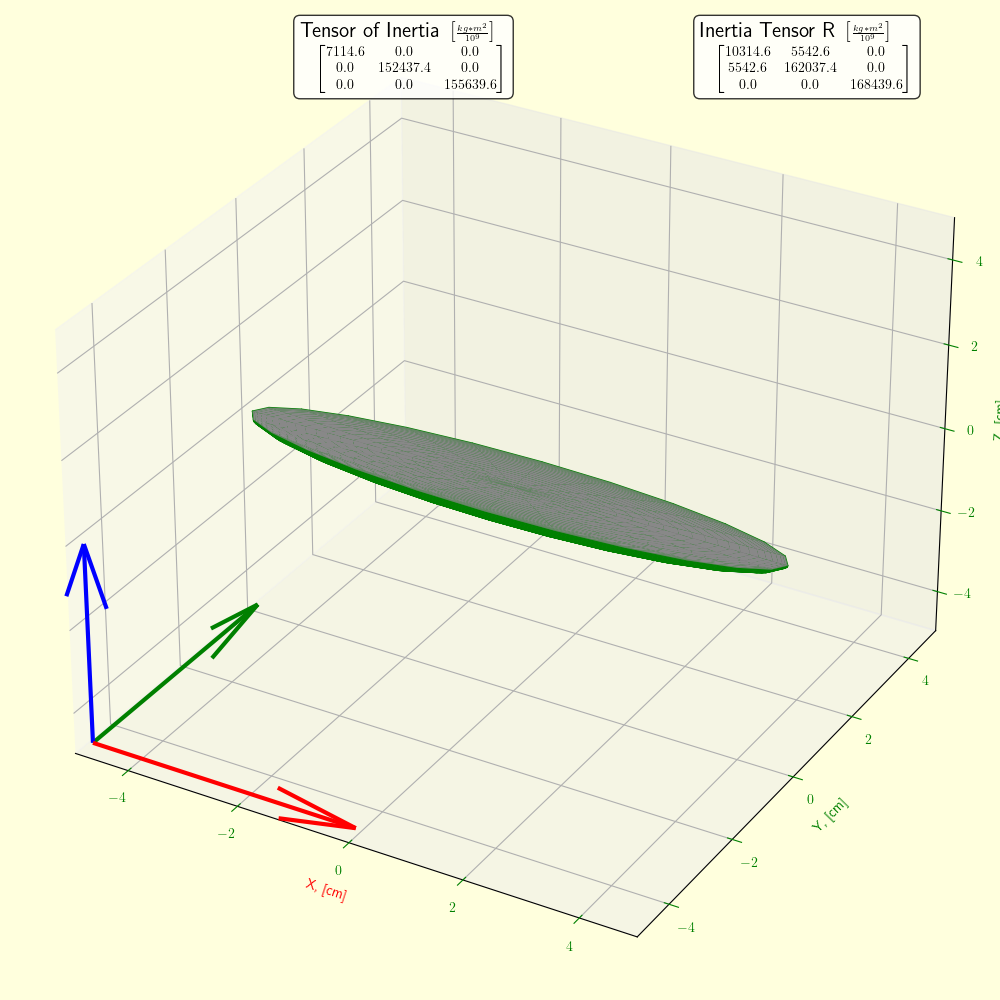

In [147]:
def моделируем_камень_полуэллипсоидом_со_сдвигом_массы():
    _, I_1 = свойства_инерции_полуэллипсоида()
    I_r = I_1 + свойства_инерции_добавленного_груза()

    def параметрическая_кривая_для_эллипсоида(u, v):
        # Параметрическая кривая для эллипсоида https://stackoverflow.com/questions/7819498/plotting-ellipsoid-with-matplotlib    
        # np.outer — для ускорения генерации сетки точек
        x = a * np.outer(np.cos(u), np.sin(v))
        y = b * np.outer(np.sin(u), np.sin(v))
        z = c * np.outer(np.ones_like(u), np.cos(v))
        return x, y, z

    def текст_на_графике(x, y, text):
        ax.text2D(x, y, text, transform=ax.transAxes, 
                fontsize=15, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1,1,1, projection='3d',  position=[0, 0, 1, 1])
    ax.set_facecolor('#ffffdd')
    ax.grid(color='green')

    ax.set_xlabel('X, [cm]', color='red')
    ax.set_ylabel('Y, [cm]', color='green')
    ax.set_zlabel('Z, [cm]', color='green')

    # возьмем по длине камня
    предел = a 
    ax.set_xlim([-предел, предел])
    ax.set_ylim([-предел, предел])
    ax.set_zlim([-предел, предел])
    
    ax.tick_params(colors='green')

    # русский в надписях сходу не заработал, надо возится с шаблонами латеха.
    текст_на_графике(0.3, 1, текст_для_тензора(I_1, 'Tensor of Inertia'))
    текст_на_графике(0.7, 1, текст_для_тензора(I_r, 'Inertia Tensor R'))

    точек_в_поверхности = 25
    # угол по YAW-плоскости
    u = np.linspace(0, 2 * np.pi, точек_в_поверхности)
    # угол по нижней полусфере
    v = np.linspace(np.pi/2, np.pi, точек_в_поверхности)

    x, y, z = параметрическая_кривая_для_эллипсоида(u, v)
    ax.plot_surface(x, y, z, color='white', edgecolor='green', zorder = 0.5)
    z_крышка_эллипсоида = np.zeros_like(z)

    ax.plot_surface(x, y, z_крышка_эллипсоида, color = 'white', zorder = 1)

    #рисуем стрелки осей
    ax.quiver(-предел, -предел, -предел, предел, 0, 0, color='red', alpha=1, lw=3, zorder = 10000) 
    ax.quiver(-предел, -предел, -предел, 0, предел, 0, color='green', alpha=1, lw=3)  
    ax.quiver(-предел, -предел, -предел, 0, 0, предел, color='blue', alpha=1, lw=3)

моделируем_камень_полуэллипсоидом_со_сдвигом_массы()

## Моделирование конкретного «кельтского камня»

Мы сделали 3D-модель камня 

![](pics/pic20240113190819.png)

![](pics/pic20240113185541.png)

![](pics/pic20240113191913.png)

![](pics/pic20240113184753.png)


В этот раз, мы будем использовать не символическую математику с sympy, а простые численные методы из numpy, для примитивного численного интегрирования в виде суммирования.

Для этого, мы «вокселизируем» модель — разобъем ее на отдельные кубики-вокселы, что наверное знакомо что-то слышащим о MineCraft.

Чтобы представить, покажем одно из самых грубых разбиений (реально будем работать с более детальным):

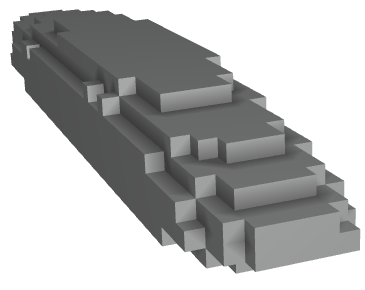

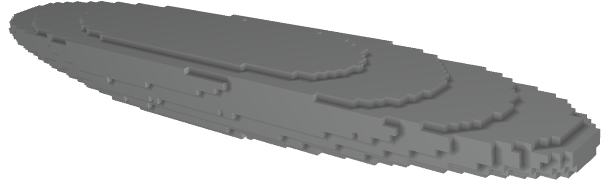

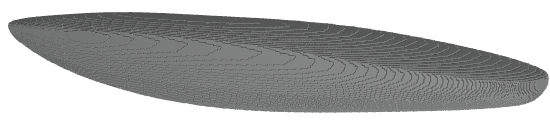

После этого можно просто считать простой файл с координатами этих кубиков-вокселов, и не потребуется символическое интегрирование, достаточно будет численного интегрирования или даже суммирование. Проделаем это используя питоновые модули numpy-scipy

Попробуем теперь численно найти моменты инерции относительно оси через центр масс из этой дискретной модели

* $I_{x} = \sum_k m_k (y_k^2 + z_k^2)$
* $I_{y} = \sum_k m_k (x_k^2 + z_k^2)$
* $I_{z} = \sum_k m_k (x_k^2 + y_k^2)$
* $I_{xy} = I_{yx} = -\sum_k m_k x_k y_k$
* $I_{xz} = I_{zx} = -\sum_k m_k x_k z_k$
* $I_{yz} = I_{zy} = -\sum_k m_k y_k z_k$

На массу пока временно забъем.

In [157]:
def моменты_инерции_для_вокселей(x, y, z):
    N = len(x)
    масса_вокселя = Вес.to('kg').value / N 
    I_xx = sum(y**2 + z**2) 
    I_yy = sum(x**2 + z**2) 
    I_zz = sum(x**2 + y**2) 
    I_xy = sum(x*y) 
    I_yz = sum(y*z) 
    I_xz = sum(x*z) 
    I = np.array([
        [I_xx, I_xy, I_xz],      
        [I_xy, I_yy, I_yz],      
        [I_xz, I_yz, I_zz],      
    ]) * масса_вокселя / 10**6

    return I

In [152]:
def масштабированные_координаты_по_воксель_модели(имя_файла):
    # выкидываем инфо о цветах, только координаты
    координаты = np.loadtxt('voxels/our-blend-v01_75x47x395.txt', unpack=True, delimiter=',', dtype=float)[:3,:]

    #центруем все оси
    for i, ax in enumerate(координаты):
        mean = (np.max(ax) - np.min(ax)) / 2 
        #координаты[i, :]
        ax -= mean
        pass
    
    # масштабируем, чтобы самое большое измерение соответствовало длине в миллиметрах
    максимальная_координата = np.max(координаты)
    a = Длина.to('mm').value / 2
    масштаб = a / максимальная_координата 
    координаты *= масштаб
    # так получилось при моделировании и вокселизации, переставим оси и перевернем зет.
    y, z, x  = координаты 
    z = -z
    return x,y,z


In [158]:
# x, y, z = масштабированные_координаты_по_воксель_модели('voxels/our-blend-v01_75x47x395.txt')
# I = моменты_инерции_для_вокселей(x, y, z)
# I

array([[ 4.7e-07, -8.7e-08,  4.5e-08],
       [-8.7e-08,  6.9e-06, -1.5e-09],
       [ 4.5e-08, -1.5e-09,  7.1e-06]])

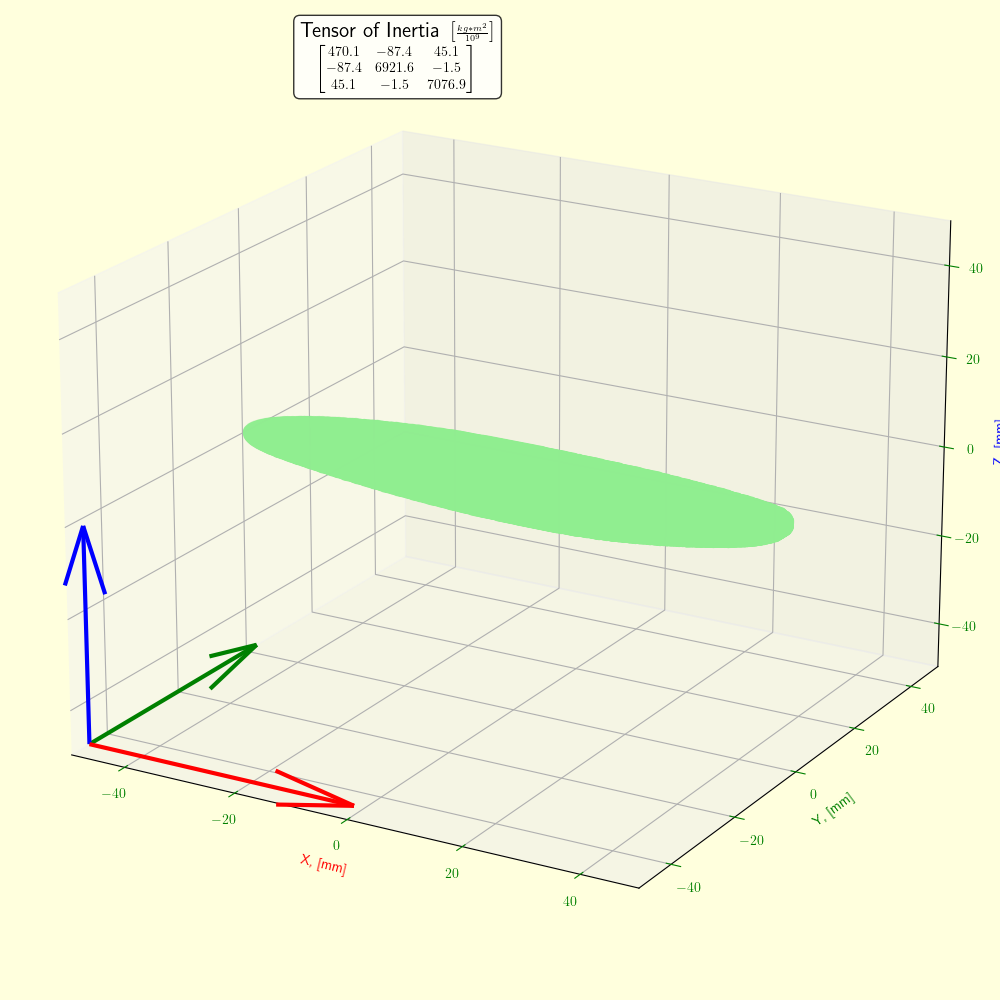

In [160]:
def визуализировать_воксель_модель(имя_файла):
    # выкидываем инфо о цветах, только координаты
    координаты = np.loadtxt('voxels/our-blend-v01_75x47x395.txt', unpack=True, delimiter=',', dtype=float)[:3,:]

    #центруем все оси
    for i, ax in enumerate(координаты):
        mean = (np.max(ax) - np.min(ax)) / 2 
        #координаты[i, :]
        ax -= mean
        pass
    
    # масштабируем, чтобы самое большое измерение соответствовало длине в миллиметрах
    максимальная_координата = np.max(координаты)
    a = Длина.to('mm').value / 2
    масштаб = a / максимальная_координата 
    координаты *= масштаб
    # так получилось при моделировании и вокселизации, переставим оси и перевернем зет.
    y, z, x  = координаты 
    z = -z

    def текст_на_графике(x, y, text):
        ax.text2D(x, y, text, transform=ax.transAxes, 
                fontsize=15, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1,1,1, projection='3d',  position=[0, 0, 1, 1])
    ax.set_facecolor('#ffffdd')
    ax.grid(color='green')

    ax.set_xlabel('X, [mm]', color='red')
    ax.set_ylabel('Y, [mm]', color='green')
    ax.set_zlabel('Z, [mm]', color='blue')

    # возьмем по длине камня
    предел = a 
    ax.set_xlim([-предел, предел])
    ax.set_ylim([-предел, предел])
    ax.set_zlim([-предел, предел])
    
    ax.tick_params(colors='green')

    # русский в надписях сходу не заработал, надо возится с шаблонами латеха.
    I = моменты_инерции_для_вокселей(x, y, z)
    текст_на_графике(0.3, 1, текст_для_тензора(I, 'Tensor of Inertia'))

    ax.scatter(x, y, z, color='lightgreen')
    ax.view_init(elev=20)

    #рисуем стрелки осей
    ax.quiver(-предел, -предел, -предел, предел, 0, 0, color='red', alpha=1, lw=3, zorder = 10000) 
    ax.quiver(-предел, -предел, -предел, 0, предел, 0, color='green', alpha=1, lw=3)  
    ax.quiver(-предел, -предел, -предел, 0, 0, предел, color='blue', alpha=1, lw=3)

    ...


визуализировать_воксель_модель('voxels/our-blend-v01_75x47x395.txt')    
